In [ ]:
import numpy as np
import networkx as nx
import random

In [ ]:
def lattice_setup(n):
    G = nx.grid_2d_graph(n, n, periodic=True)
    return G

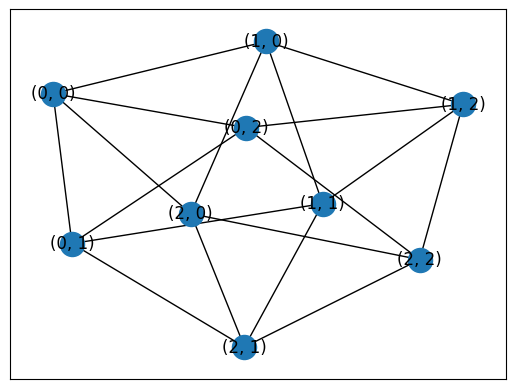

In [44]:
G = lattice_setup(3)
nx.draw_networkx(G)

In [45]:
G.nodes

NodeView(((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)))

In [46]:
G.edges

EdgeView([((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 0), (2, 0)), ((0, 0), (0, 2)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 1), (2, 1)), ((0, 2), (1, 2)), ((0, 2), (2, 2)), ((1, 0), (2, 0)), ((1, 0), (1, 1)), ((1, 0), (1, 2)), ((1, 1), (2, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), ((2, 0), (2, 1)), ((2, 0), (2, 2)), ((2, 1), (2, 2))])

In [50]:
random.choice(list(G.edges))

((1, 0), (2, 0))

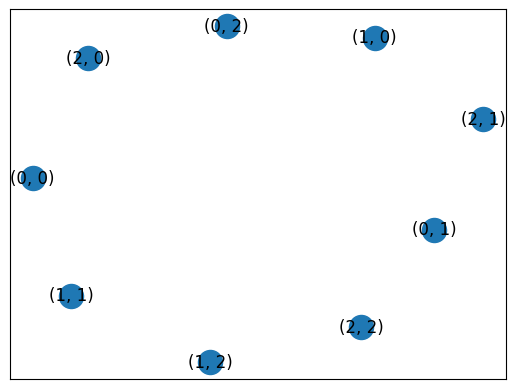

In [86]:
sim = lattice_setup(3)
sim.clear_edges()
nx.draw_networkx(sim)

In [57]:
def add_random_edge(G, sim, p):
    random_edge = random.choice(list(G.edges))
    print(random_edge)
    if random.random() <= p:
        sim.add_edge(*random_edge)

((1, 1), (2, 1))


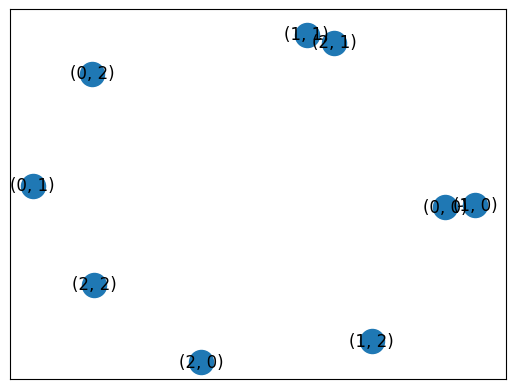

In [89]:
add_random_edge(G, sim, 0.5)

nx.draw_networkx(sim)

In [122]:
sim.add_edge((0,1),(0,2))

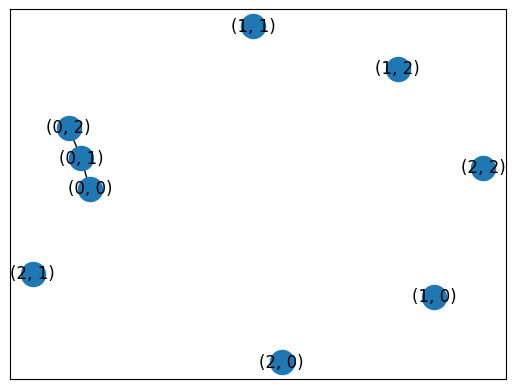

In [123]:
nx.draw_networkx(sim)

In [130]:
nx.cycle_basis(G)

[[(2, 1), (2, 0), (2, 2)],
 [(1, 0), (0, 0), (2, 0)],
 [(0, 2), (0, 0), (2, 0), (2, 2)],
 [(0, 2), (0, 1), (0, 0)],
 [(2, 1), (0, 1), (0, 0), (2, 0)],
 [(2, 1), (1, 1), (0, 1)],
 [(1, 0), (1, 1), (0, 1), (0, 0)],
 [(1, 2), (1, 1), (0, 1), (0, 0), (2, 0), (2, 2)],
 [(1, 2), (1, 0), (2, 0), (2, 2)],
 [(1, 2), (0, 2), (2, 2)]]

In [133]:
def is_cycle_winding_vertical(cycle, n):
    for consecutive_edges in zip(cycle, cycle[1:] + [cycle[0]]):
        if abs(consecutive_edges[0][0] - consecutive_edges[1][0]) == n-1:
            return True
    return False

def is_cycle_winding_horizontal(cycle, n):
    for consecutive_edges in zip(cycle, cycle[1:] + [cycle[0]]):
        if abs(consecutive_edges[0][1] - consecutive_edges[1][1]) == n-1:
            return True
    return False


In [134]:
for cycle in nx.cycle_basis(G):
    print(is_cycle_winding_vertical(cycle, 3))

print("----")

for cycle in nx.cycle_basis(G):
    print(is_cycle_winding_horizontal(cycle, 3))

False
True
True
False
True
True
False
True
False
True
----
True
False
True
True
False
False
False
True
True
False


Given $N$, $p$, we want to create a function that randomly opens edges on a periodic square lattice with probablity $p$ and outputs the proportion of open edges over possible edges when one type and both types of periodic paths first arise.

We want to repeat the function for a large amounts of trials as we vary both $N$, $p$ to collect data on the relationship between the arisal of types of periodic paths and $N$, $p$.

Our steps for the function include the following:

1) Create a reference periodic square lattice $G$
2) Create a simulation empty periodic square lattice $sim$
3) Choose a random edge $e_r$ from $G$ and add it to $sim$ with probability $p$
4) Check if a horizontal periodic path exists and check if a veritical periodic path exists in $sim$
5) If at least one type of periodic path exists and none existed before note down the proportion of open edges over possible edges
6) If both types exist, note down the proportion of open edges over possible edges and return the values for the two types; if not, repeat from step 3.

In [139]:
def simulate_percolation(N, p):
    prop_first = -1
    prop_second = -1
    ref_graph = lattice_setup(N)
    sim_graph = lattice_setup(N)
    sim_graph.clear_edges()

    while prop_second == -1:
        random_edge = random.choice(list(ref_graph.edges))
        if random.random() <= p:
            sim_graph.add_edge(*random_edge)
        
        has_vertical_periodic_path = False
        has_horizontal_periodic_path = False

        for cycle in nx.cycle_basis(sim_graph):
            if is_cycle_winding_vertical(cycle, N):
                has_vertical_periodic_path = True
            if is_cycle_winding_horizontal(cycle, N):
                has_horizontal_periodic_path = True
        
        if (has_vertical_periodic_path or has_horizontal_periodic_path) and prop_first == -1:
            prop_first = len(sim_graph.edges) / (2*(N**2))
        if has_vertical_periodic_path and has_horizontal_periodic_path:
            prop_second = len(sim_graph.edges) / (2*(N**2))
    
    nx.draw_networkx(sim_graph)

    return prop_first, prop_second
        


(0.5555555555555556, 0.6666666666666666)

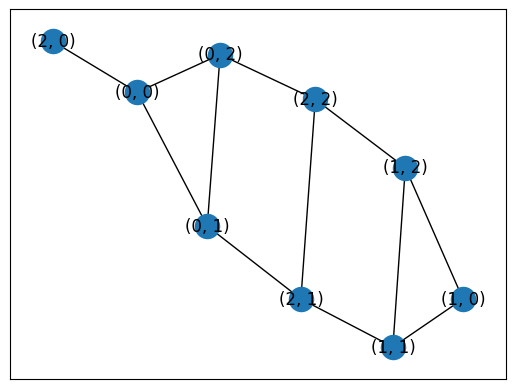

In [148]:
simulate_percolation(3, 0.5)